# About the data

The data for this Project is taken from: https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data. 

# Accessing the activities for this course 

The activities in this course use Python code to make it quick and easy for you to analyse a data set. 

This activity contains additional guidance about how to use notebooks in **deepnote**. When using these notebooks you should be able to:

* Run ready-made Python code in the notebook
* Make changes to the code and see the effects

## Running the code

The next box holds some lines of Python code. Some lines start with the hashtag symbol #. These lines are comments. The comments explain what the code does. 

* Click anywhere in the box of code. 
* You will see an arrow to the right of the box. Click on the arrow to run the code.

The code below:
* **Imports** the pandas module for data analysis. You only have to do this once in each notebook.
* **Imports** the seaborn module for plotting charts/diagrams. You only have to do this once in each notebook.

In [1]:
# import pandas for data analysis
import pandas as pd 

# import seaborn for visualisations
import seaborn as sns

## Importing the data

Run the code in the box below to import the csv file as a data set.

The output of the code will appear below it.

In [2]:
# import the csv file to a data set called weather_data
weather_data = pd.read_csv('met-office-weather-month.csv')

# display the data to verify it has imported
weather_data

,year,month,tmax,tmin,af,rain,sun,station,decade
0,1978,9,17.5,11.3,0.0,26.7,NaN,camborne,1970s
1,1978,10,15.6,10.7,0.0,20.4,NaN,camborne,1970s
2,1978,11,12.6,7.6,0.0,56.3,NaN,camborne,1970s
3,1978,12,9.2,5.0,5.0,276.7,NaN,camborne,1970s
4,1979,1,6.5,0.9,13.0,134.8,NaN,camborne,1970s
...,...,...,...,...,...,...,...,...,...
2891,2020,2,7.8,1.0,10.0,121.6,99.0,leuchars,2020s
2892,2020,3,9.7,2.1,7.0,20.4,132.9,leuchars,2020s
2893,2020,4,12.1,3.4,4.0,7.4,189.0,leuchars,2020s
2894,2020,5,16.9,6.5,1.0,18.2,240.7,leuchars,2020s


The columns show readings for nine features

* Year (`year`)
* Month of the year: 1 for January, ... 12 for December (`month`)
* Mean daily maximum temperature, °C (`tmax`)
* Mean daily minimum temperature, °C (`tmin`)
* Days of air frost, days (`af`)
* Total rainfall, mm (`rain`)
* Total sunshine duration, hours (`sun`)
* Weather station (`station`)
* Decade (`decade`)

It is useful to know how the data has been stored. Each column is either an integer (`int64`), a general number (`float64`) or text (`object`). This will have an effect on which commands from the libraries you can use on the features. Run the code box below to see the data types for the features.

In [3]:
# display the data types of the features
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     2896 non-null   int64  
 1   month    2896 non-null   int64  
 2   tmax     2894 non-null   float64
 3   tmin     2894 non-null   float64
 4   af       2882 non-null   float64
 5   rain     2894 non-null   float64
 6   sun      2637 non-null   float64
 7   station  2896 non-null   object 
 8   decade   2896 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 203.8+ KB


<a id='eda1'></a>
# Exploratory Data Analysis (1)
<a id='tmax'></a>
## Exploring `tmax`

In [4]:
# use describe to get the statistics for the feature
weather_data['tmax'].describe()

count    2894.000000
mean       13.889599
std         5.140326
min         0.400000
25%         9.700000
50%        13.600000
75%        18.100000
max        28.300000
Name: tmax, dtype: float64

Pandas can give `float64` values to more decimal places than is useful. You can use `.round(n)` to round the values to n decimal places. 

In [5]:
# use describe to get the statistics for the feature rounded to 2 dp
weather_data['tmax'].describe().round(2)

count    2894.00
mean       13.89
std         5.14
min         0.40
25%         9.70
50%        13.60
75%        18.10
max        28.30
Name: tmax, dtype: float64

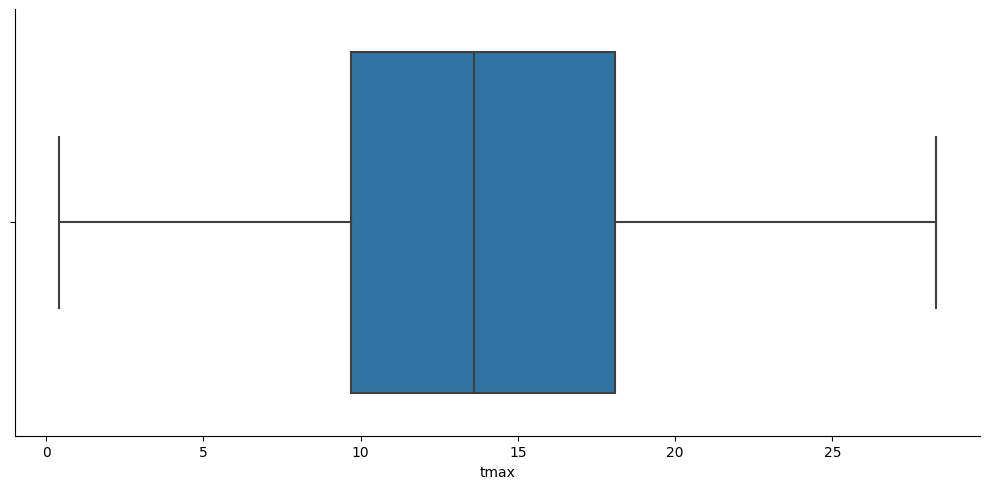

In [6]:
# draw a box plot for the feature using catplot
sns.catplot(data=weather_data, kind='box', x='tmax',aspect=2 );

In [7]:
# get the statistics for the feature grouped by station
weather_data.groupby('station')['tmax'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
station,,,,,,,,
camborne,502.0,13.438,3.793,3.1,10.3,12.85,16.875,22.5
heathrow,870.0,14.919,5.783,0.8,9.8,14.70,20.100,28.3
hurn,761.0,14.598,5.153,0.4,10.2,14.40,19.400,26.9
leuchars,761.0,12.302,4.683,2.3,8.2,12.20,16.600,21.9


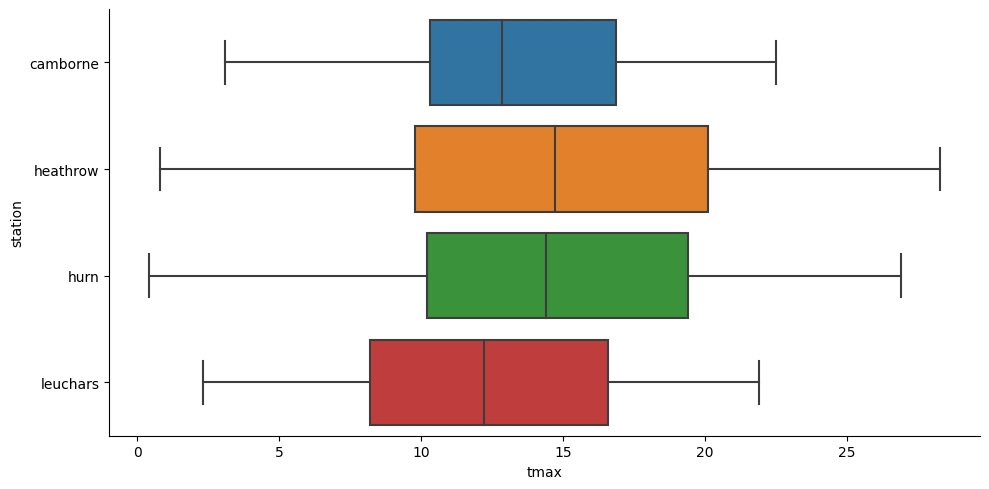

In [8]:
# draw box plots grouped by station
sns.catplot(data=weather_data, kind='box', x='tmax', y='station', aspect=2 );

<a id='tmin'></a>
## Exploring `tmin`

Use the `describe` command to find summary statistics for `tmin`. 

* What are the mean and median values of `tmin`?

In [9]:
# use describe to get the statistics for the feature
weather_data['tmin'].describe()

count    2894.000000
mean        6.443711
std         4.217458
min        -6.100000
25%         2.900000
50%         6.100000
75%        10.100000
max        16.700000
Name: tmin, dtype: float64

Draw a box plot for `tmin` using `catplot`

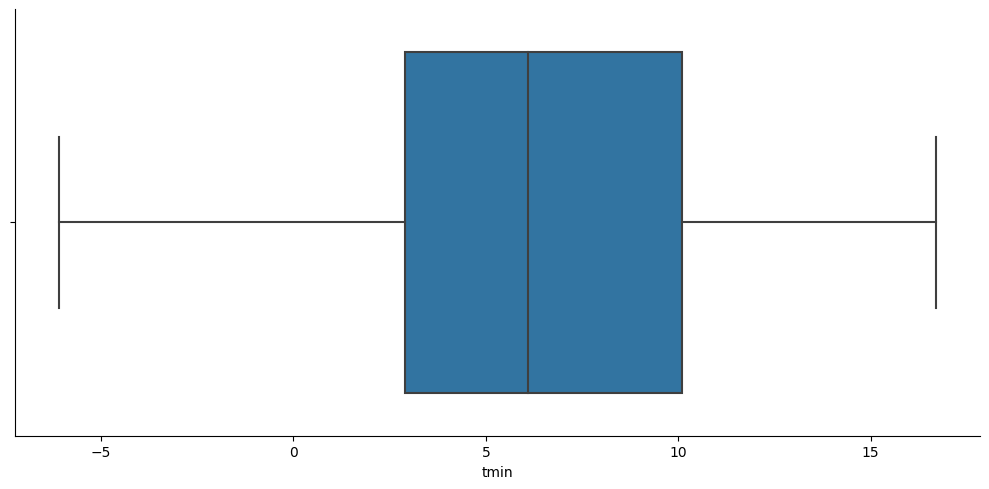

In [10]:
# draw a box plot for the feature using catplot
sns.catplot(data=weather_data, kind='box', x='tmin',aspect=2 );

Use `groupby` to find statistics for `tmin` grouped by `station`

* What is the lower quartile at Heathrow?
* What is the standard deviation at Hurn?

Draw box plots of `tmin` grouped by station

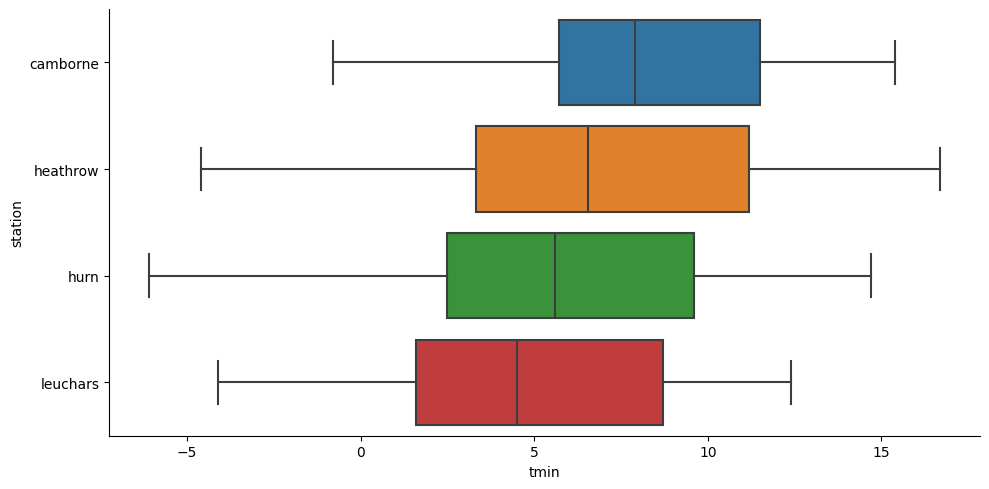

In [11]:
# draw box plots grouped by station
sns.catplot(data=weather_data, kind='box', x='tmin', y='station', aspect=2 );


<a id='preprocessing'></a>
# Pre-processing the data
<a id='slice'></a>
## Taking a '*slice*' of the data

The data includes weather for different weather stations. You can view the list of stations using the `unique` command.

In [12]:
# display a list of stations using unique
weather_data['station'].unique()

array(['camborne', 'heathrow', 'hurn', 'leuchars'], dtype=object)

You can create a subset of the original data (or '*slice*') by filtering for the rows where the station is heathrow.

In [13]:
# create a new data set called heathrow_data where the station value is 'heathrow'
# adding .copy() to the command informs pandas to create a copy first - this is not essential in this example but is good practice in general when "slicing" a data set. 
heathrow_data=weather_data[weather_data['station']=='heathrow'].copy()

# display the data set to show that it has been created correctly
heathrow_data

,year,month,tmax,tmin,af,rain,sun,station,decade
502,1948,1,8.9,3.3,NaN,85.0,NaN,heathrow,1940s
503,1948,2,7.9,2.2,NaN,26.0,NaN,heathrow,1940s
504,1948,3,14.2,3.8,NaN,14.0,NaN,heathrow,1940s
505,1948,4,15.4,5.1,NaN,35.0,NaN,heathrow,1940s
506,1948,5,18.1,6.9,NaN,57.0,NaN,heathrow,1940s
...,...,...,...,...,...,...,...,...,...
1367,2020,2,11.1,4.3,1.0,99.8,62.0,heathrow,2020s
1368,2020,3,12.0,3.9,1.0,42.8,148.0,heathrow,2020s
1369,2020,4,18.2,6.5,1.0,38.2,235.4,heathrow,2020s
1370,2020,5,21.1,9.1,0.0,2.0,308.6,heathrow,2020s


<a id='eda2'></a>
# Exploratory data analysis (2)
<a id='slice1'></a>
## Exploring a slice of the data for Heathrow

In [14]:
# get the statistics grouped by decade
heathrow_data.groupby('decade')['tmax'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
decade,,,,,,,,
1940s,24.0,15.496,5.588,7.9,9.975,15.80,19.900,25.1
1950s,120.0,14.298,5.806,2.9,9.300,14.10,19.425,24.7
1960s,120.0,14.002,5.775,0.8,8.875,14.25,19.625,23.9
1970s,120.0,14.511,5.734,3.8,9.475,13.80,19.625,26.6
1980s,120.0,14.584,5.814,1.7,9.650,14.20,19.850,27.6
1990s,120.0,15.406,5.765,5.4,10.675,14.65,20.425,27.0
2000s,120.0,15.618,5.665,6.8,10.575,15.30,20.850,28.2
2010s,120.0,15.854,5.885,3.9,10.375,15.80,20.975,28.3
2020s,6.0,15.833,5.436,10.1,11.325,15.10,20.375,22.5


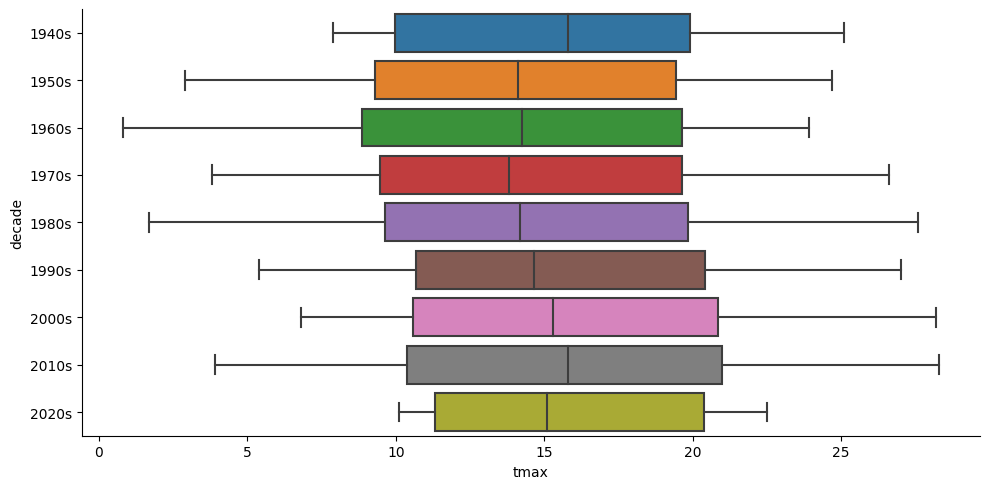

In [15]:
# draw the box plots grouped by decade
sns.catplot(data=heathrow_data, kind='box', x='tmax', y='decade', aspect=2 );

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=99aaf7e0-5868-4f34-9198-21a5f2425a10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>